In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('/content/drive/MyDrive/water_potability.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [15]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


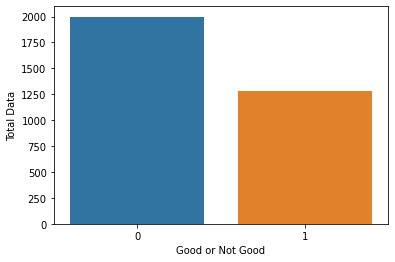

In [16]:
sns.countplot(x='Potability', data=df)
plt.xlabel('Good or Not Good')
plt.ylabel('Total Data')
plt.show()

In [17]:
#Checking for missing values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

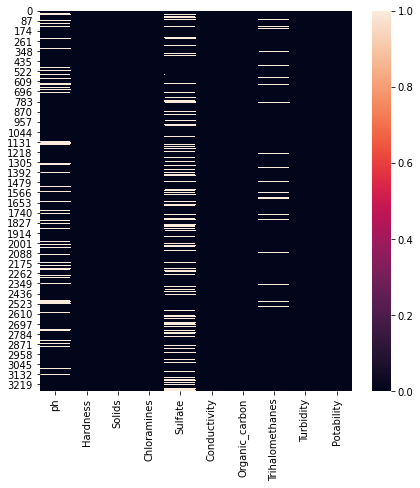

In [19]:
plt.figure(figsize=(7,7))
sns.heatmap(data=df.isnull())

In [20]:
df['ph'].describe()

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64

In [21]:
df['Sulfate'].describe()

count    2495.000000
mean      333.775777
std        41.416840
min       129.000000
25%       307.699498
50%       333.073546
75%       359.950170
max       481.030642
Name: Sulfate, dtype: float64

In [22]:
df['Trihalomethanes'].describe()

count    3114.000000
mean       66.396293
std        16.175008
min         0.738000
25%        55.844536
50%        66.622485
75%        77.337473
max       124.000000
Name: Trihalomethanes, dtype: float64

In [23]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['Trihalomethanes']] = imputer1.fit_transform(df[['Trihalomethanes']])
df[['Sulfate']] = imputer1.fit_transform(df[['Sulfate']])
df[['ph']] = imputer1.fit_transform(df[['ph']])

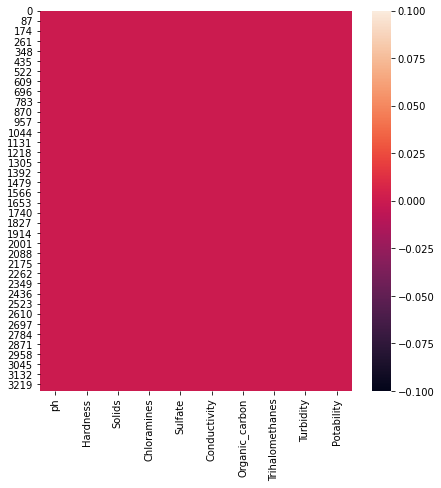

In [24]:
plt.figure(figsize=(7,7))
sns.heatmap(data=df.isnull())

Now Dataset is clean, No missing values.

In [26]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


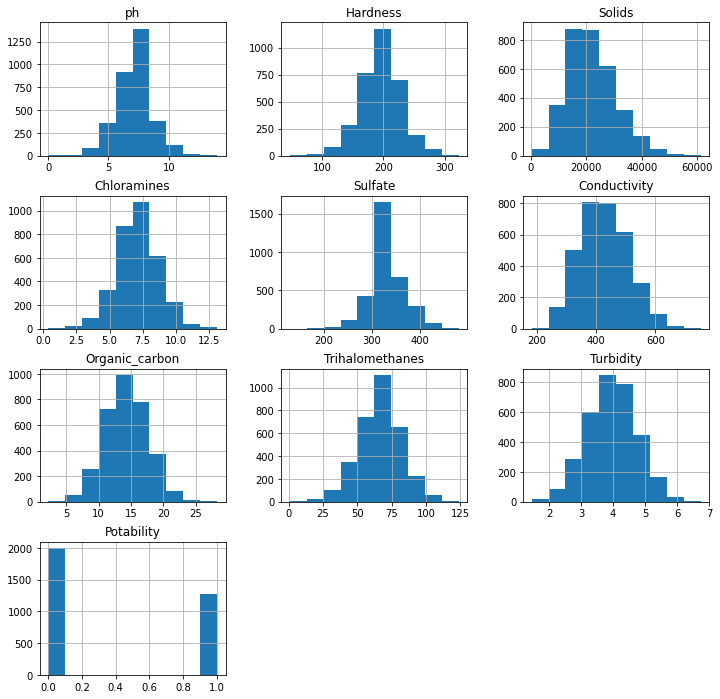

In [29]:
df.hist(figsize=(12,12))
plt.show()

In [30]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [36]:
models = {
    "Linear Regression": LinearRegression(fit_intercept=True),
    "KNN": KNeighborsClassifier(),
    "SVM" :SVC(),
    "Naive Bayes": GaussianNB(),
    "Decisiontree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(max_features='sqrt', random_state=5),
    "LogisticRegression": LogisticRegression()
}

for model in models.items():
    m = model[1]
    m.fit(X_train, y_train)
    print(model[0])
    print("Score: ", m.score(X_test,y_test))
    print("")

Linear Regression
Score:  0.004503233514132954

KNN
Score:  0.6275946275946276

SVM
Score:  0.6959706959706959

Naive Bayes
Score:  0.6361416361416361

Decisiontree
Score:  0.5970695970695971

RandomForest
Score:  0.6727716727716728

LogisticRegression
Score:  0.6227106227106227



In [41]:
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "XGBClassifier" :xgb.XGBClassifier()
}
for model in models.items():
    m = model[1]
    m.fit(X_train, y_train)
    print(model[0])
    print("Score: ", m.score(X_test,y_test))
    print("")

GradientBoostingClassifier
Score:  0.6617826617826618

AdaBoostClassifier
Score:  0.6373626373626373

XGBClassifier
Score:  0.6715506715506715



Best among all classifier is SVM

In [42]:
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(SVC(), X_train, y_train, cv=3)

confusion_matrix(y_train, y_train_pred)

array([[1376,  112],
       [ 691,  278]])